In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

# Load the dataset
data = pd.read_csv("train.csv")  # Replace with the actual path

# Separate features and target
X = data.drop('quality', axis=1)
y = data['quality']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Cross-validation predictions
y_cv_pred = cross_val_predict(rf_regressor, X, y, cv=5)

Mean Squared Error: 0.2979729257641922


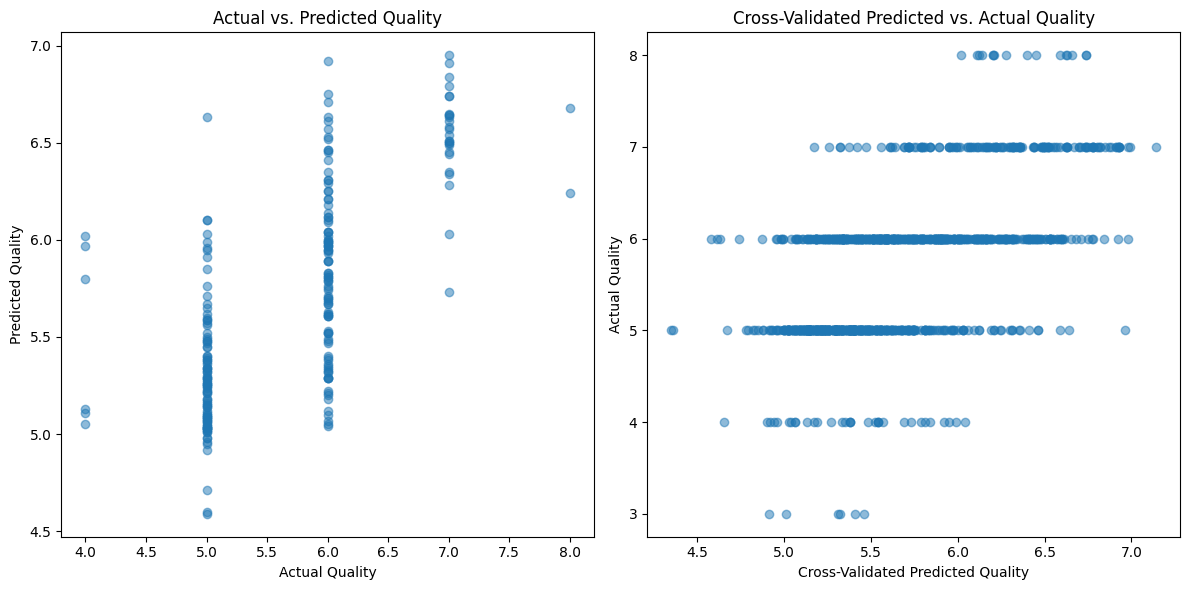

In [2]:
# Data visualization
plt.figure(figsize=(12, 6))

# Compare actual vs. predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs. Predicted Quality")

# Compare predicted vs. cross-validated predicted values
plt.subplot(1, 2, 2)
plt.scatter(y_cv_pred, y, alpha=0.5)

plt.xlabel("Cross-Validated Predicted Quality")
plt.ylabel("Actual Quality")
plt.title("Cross-Validated Predicted vs. Actual Quality")

plt.tight_layout()
plt.show()